In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [4]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data_cleaned = pd.concat([sheet1, sheet2], ignore_index = True)
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [5]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.date
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09


In [7]:
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2
...,...,...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09,3
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3


In [8]:
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09,3,12
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12


In [9]:
data_cleaned['Day'] = pd.to_datetime(data_cleaned['Day'])
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09,3,12
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,3,12


In [10]:
data_cleaned_new = data_cleaned[['Invoice','StockCode','Day','Quantity']]
data_cleaned_new

,Invoice,StockCode,Day,Quantity
0,536365,85123A,2010-12-01,6
1,536365,71053,2010-12-01,6
2,536365,84406B,2010-12-01,8
3,536365,84029G,2010-12-01,6
4,536365,84029E,2010-12-01,6
...,...,...,...,...
1067366,538171,22271,2010-12-09,2
1067367,538171,22750,2010-12-09,1
1067368,538171,22751,2010-12-09,1
1067369,538171,20970,2010-12-09,2


In [11]:
data_cleaned_new['Day'] = pd.to_datetime(data_cleaned_new['Day'])
data_cleaned_new

C:\Users\2851766\AppData\Local\Temp\ipykernel_4468\4273110671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_new['Day'] = pd.to_datetime(data_cleaned_new['Day'])


,Invoice,StockCode,Day,Quantity
0,536365,85123A,2010-12-01,6
1,536365,71053,2010-12-01,6
2,536365,84406B,2010-12-01,8
3,536365,84029G,2010-12-01,6
4,536365,84029E,2010-12-01,6
...,...,...,...,...
1067366,538171,22271,2010-12-09,2
1067367,538171,22750,2010-12-09,1
1067368,538171,22751,2010-12-09,1
1067369,538171,20970,2010-12-09,2


In [12]:
cutoff_date = data_cleaned_new['Day'].max() - pd.Timedelta(days=60)
till_last_60_days = data_cleaned_new[data_cleaned_new['Day'] < cutoff_date]
till_last_60_days

,Invoice,StockCode,Day,Quantity
0,536365,85123A,2010-12-01,6
1,536365,71053,2010-12-01,6
2,536365,84406B,2010-12-01,8
3,536365,84029G,2010-12-01,6
4,536365,84029E,2010-12-01,6
...,...,...,...,...
1067366,538171,22271,2010-12-09,2
1067367,538171,22750,2010-12-09,1
1067368,538171,22751,2010-12-09,1
1067369,538171,20970,2010-12-09,2


In [13]:
train_data = till_last_60_days.groupby(['StockCode', 'Day'])['Quantity'].sum().reset_index()
train_data

,StockCode,Day,Quantity
0,10002,2009-12-01,12
1,10002,2009-12-03,7
2,10002,2009-12-04,73
3,10002,2009-12-06,49
4,10002,2009-12-07,2
...,...,...,...
474928,gift_0001_90,2010-08-09,10
474929,m,2010-02-19,2
474930,m,2010-04-13,1
474931,m,2010-06-08,1


In [14]:
train_individual = train_data.pivot(index= 'Day', columns= 'StockCode', values= 'Quantity').fillna(0)
train_individual

StockCode,10002,10080,10109,10120,10125,10133,10134,10135,10138,11001,...,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,gift_0001_60,gift_0001_70,gift_0001_80,gift_0001_90,m
Day,,,,,,,,,,,,,,,,,,,,,
2009-12-01,12.0,0.0,0.0,60.0,5.0,6.0,0.0,17.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-02,0.0,1.0,0.0,10.0,0.0,0.0,0.0,20.0,96.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-03,7.0,0.0,4.0,0.0,0.0,40.0,13.0,14.0,35.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-04,73.0,3.0,0.0,30.0,46.0,25.0,0.0,10.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-05,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-06,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
last_60_days = data_cleaned_new[data_cleaned_new['Day'] >= data_cleaned_new['Day'].max() - pd.Timedelta(days=60)]
last_60_days

,Invoice,StockCode,Day,Quantity
386807,570247,21523,2011-10-10,10
386808,570247,23284,2011-10-10,10
386809,570247,23536,2011-10-10,4
386810,570247,23535,2011-10-10,4
386811,570247,23530,2011-10-10,6
...,...,...,...,...
541905,581587,22899,2011-12-09,6
541906,581587,23254,2011-12-09,4
541907,581587,23255,2011-12-09,4
541908,581587,22138,2011-12-09,3


In [16]:
test_data = last_60_days.groupby(['StockCode', 'Day'])['Quantity'].sum().reset_index()
test_data

,StockCode,Day,Quantity
0,10080,2011-10-10,1
1,10080,2011-10-13,3
2,10080,2011-10-25,2
3,10080,2011-11-02,24
4,10080,2011-11-10,22
...,...,...,...
67648,S,2011-10-24,-1
67649,S,2011-10-26,1
67650,S,2011-11-18,-3
67651,gift_0001_10,2011-12-08,1


In [17]:
test_individual = test_data.pivot(index= 'Day', columns= 'StockCode', values= 'Quantity').fillna(0)
test_individual

StockCode,10080,10120,10125,10133,10135,11001,15030,15034,15036,15039,...,CRUK,D,DCGSSBOY,DCGSSGIRL,DOT,M,POST,S,gift_0001_10,gift_0001_20
Day,,,,,,,,,,,,,,,,,,,,,
2011-10-10,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,62.0,0.0,...,-1.0,0.0,0.0,0.0,3.0,16.0,8.0,-3.0,0.0,0.0
2011-10-11,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,2.0,17.0,12.0,0.0,0.0,0.0
2011-10-12,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,36.0,13.0,...,0.0,0.0,0.0,0.0,2.0,-600.0,26.0,0.0,0.0,0.0
2011-10-13,3.0,0.0,0.0,0.0,2.0,0.0,0.0,396.0,84.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,23.0,0.0,0.0,0.0
2011-10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,13.0,0.0,0.0,0.0
2011-10-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-10-17,0.0,0.0,20.0,0.0,1.0,3.0,0.0,0.0,87.0,0.0,...,-1.0,0.0,0.0,0.0,3.0,0.0,20.0,0.0,0.0,0.0
2011-10-18,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,5.0,52.0,...,0.0,0.0,0.0,0.0,3.0,-4.0,13.0,0.0,0.0,0.0
2011-10-19,0.0,0.0,0.0,0.0,20.0,16.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,1.0,2.0,7.0,17.0,0.0,0.0,0.0


In [18]:
individual1 = train_individual.iloc[:,1]

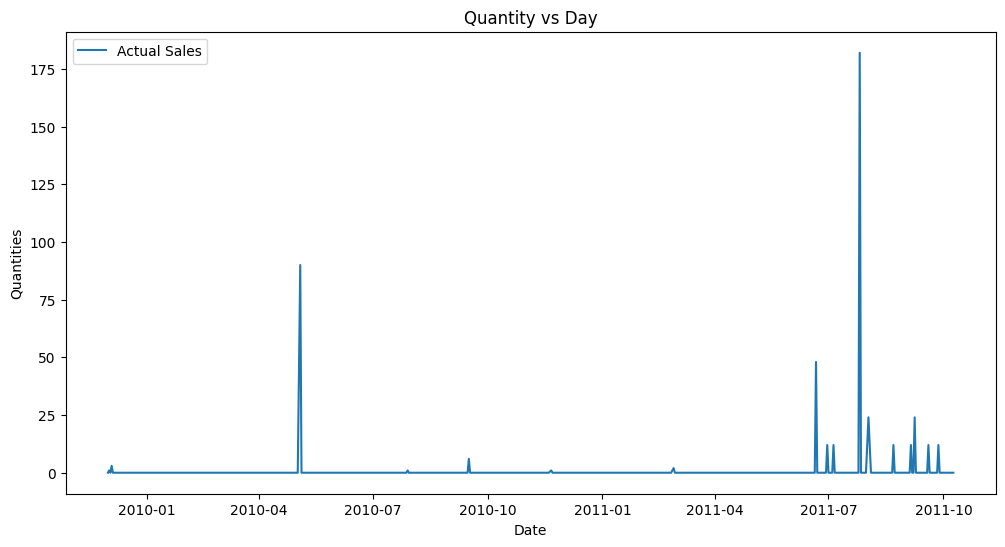

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(individual1, label="Actual Sales")
plt.title("Quantity vs Day")
plt.xlabel("Date")
plt.ylabel("Quantities")
plt.legend()
plt.show()

In [65]:
model = ARIMA(individual1, order=(1, 0, 2))
model_fit = model.fit()

C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary

In [66]:
test = test_individual.iloc[:,0]
forecast = model_fit.forecast(steps=len(test))
test_index = test.index

C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


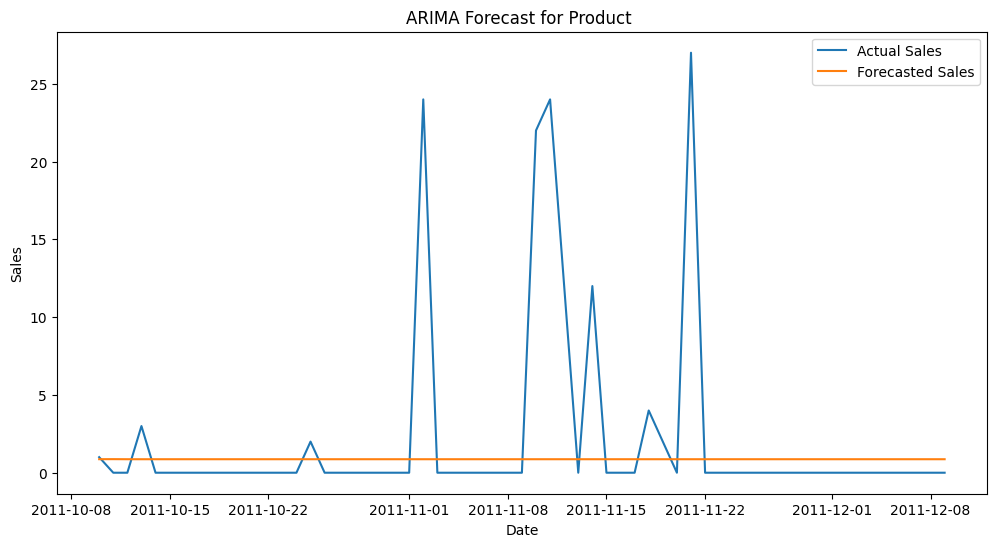

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test_index, test, label="Actual Sales")
plt.plot(test_index, forecast, label="Forecasted Sales")
plt.title("ARIMA Forecast for Product ")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [68]:
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 44.76275520031821


In [69]:
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.8182317090738502


In [25]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data = pd.concat([sheet1, sheet2], ignore_index=True)
df = pd.DataFrame(data)

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"] = df["InvoiceDate"].dt.date

grouped = df.groupby(["StockCode", "InvoiceDate"])["Quantity"].sum().reset_index()
grouped["Quantity"] = grouped["Quantity"].astype(int)

pivot = grouped.pivot(index="StockCode", columns="InvoiceDate", values="Quantity").fillna(0)
pivot = pivot.astype(int)

pivot.columns = [f"Day{i+1}" for i in range(len(pivot.columns))]
pivot.reset_index(inplace=True)

total_days = len(pivot.columns) - 1
forecast_days = 60

train = pivot.iloc[:, :-forecast_days]
test = pivot.iloc[:, -forecast_days:]
test.columns = pivot.columns[-forecast_days:]
test = pd.concat([pivot[['StockCode']], test], axis=1)

train

,StockCode,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day535,Day536,Day537,Day538,Day539,Day540,Day541,Day542,Day543,Day544
0,10002,12,0,7,73,0,49,2,12,0,...,0,0,0,0,0,0,0,0,0,0
1,10080,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
2,10109,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10120,60,10,0,30,0,0,0,1,1,...,1,0,0,0,0,0,5,1,0,0
4,10125,5,0,0,46,0,8,20,1,22,...,0,0,0,0,0,0,0,40,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,gift_0001_60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5301,gift_0001_70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5302,gift_0001_80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5303,gift_0001_90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test

,StockCode,Day545,Day546,Day547,Day548,Day549,Day550,Day551,Day552,Day553,...,Day595,Day596,Day597,Day598,Day599,Day600,Day601,Day602,Day603,Day604
0,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10080,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10120,0,5,0,0,0,0,0,0,0,...,0,4,0,0,6,0,0,0,0,0
4,10125,7,0,0,0,3,1,0,0,0,...,0,0,0,0,6,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,gift_0001_60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5301,gift_0001_70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5302,gift_0001_80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5303,gift_0001_90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# New

In [73]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data = pd.concat([sheet1, sheet2], ignore_index=True)
df = pd.DataFrame(data)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [74]:
df.drop(df.columns[0],axis = 1, inplace = True)
df

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
1067366,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [75]:
df['Date'] = pd.to_datetime(df['InvoiceDate'],format = '%Y-%m-%d %H:%M:%S' )
df

#df['Date'] = pd.to_datetime(df['InvoiceDate'])
#df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...
1067366,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09 20:01:00
1067367,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09 20:01:00
1067368,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09 20:01:00
1067369,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09 20:01:00


In [79]:
df['Date'] = df['Date'].dt.date
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [80]:
#date ranges between:
print(df['Date'].min(),' --- ', df['Date'].max())

2009-12-01  ---  2011-12-09


In [81]:
df_demand_test = df[df['StockCode'] == 71053]
df_demand_test

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
50,71053,WHITE METAL LANTERN,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom,2010-12-01
67,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,2010-12-01
281,71053,WHITE METAL LANTERN,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom,2010-12-01
417,71053,WHITE METAL LANTERN,8,2010-12-01 11:33:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...
1061931,71053,WHITE METAL LANTERN,24,2010-12-08 09:56:00,3.39,16779.0,United Kingdom,2010-12-08
1062270,71053,WHITE METAL LANTERN,4,2010-12-08 11:42:00,3.75,13126.0,United Kingdom,2010-12-08
1063092,71053,WHITE METAL LANTERN,24,2010-12-08 13:30:00,3.39,17262.0,United Kingdom,2010-12-08
1064975,71053,WHITE METAL LANTERN,4,2010-12-09 12:20:00,3.75,17526.0,United Kingdom,2010-12-09


In [82]:
df_demand_test = df_demand_test.groupby('Date').sum()
df_demand_test

TypeError: datetime64 type does not support sum operations

In [ ]:
df_demand_test = df_demand_test[['TotalSales']]
df_demand_test

In [36]:
pd.DatetimeIndex(df_demand_test.index).to_period('M')
df_demand_test.head()

TypeError: datetime64 type does not support sum operations

In [50]:
!pip install pmdarima

  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl (2.8 MB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  Partial import of pmdarima during the build process.
  
  Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
  Adding extra setuptools args
  Setting up with setuptools
  Traceback (most recent call last):
    File "C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
      ~~~~^^
    File "C:\Users\2851766\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\2851766\AppDat